In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
!gdown --id 1CWCo7GFk3lZky1EXjZ6XpHZS5tUbBOj1

Downloading...
From: https://drive.google.com/uc?id=1CWCo7GFk3lZky1EXjZ6XpHZS5tUbBOj1
To: /content/Features_no_filtering_ordered.csv
100% 83.2M/83.2M [00:01<00:00, 74.2MB/s]


In [52]:
data = pd.read_csv('/content/Features_no_filtering_ordered.csv')
data.iloc[:,200:]
# to_delete = np.array(data.columns[222:261])
# tmp = np.array(data.columns[156:204])
# to_delete = np.concatenate((tmp, to_delete))
to_delete = np.array(data.columns[156:204])
# to_delete
data.drop(columns=to_delete, inplace=True)
data

,teager_kaiser_energy_6mean,time_corr_F8,max_cross_corr_C4,fractal_katz,phase_lock_val_F3,fisher_information,decorr_time,max_cross_corr_T8,max_cross_corr_P3,spect_corr_C4,spect_corr_O1,spect_corr_O2,energy_freq_bands_band2,entropy_spectral,teager_kaiser_energy_4mean,max_cross_corr_Pz,higuchi_fd,phase_lock_val_C3,spect_corr_F8,complexity_mspe,teager_kaiser_energy_3mean,spect_corr_P8,wavelet_coef_energy_1,entropy_svd,ptp_amp,spect_corr_T7,first_der,Theta_ratio,time_corr_O1,complexity_se,Beta,eig,max_cross_corr_T7,spect_edge_freq,teager_kaiser_energy_1std,entropy_shannon,phase_lock_val_C4,spect_corr_T8,Alpha_ratio,fractal_psdslope,...,Subj_4,Subj_5,Subj_6,Subj_7,Subj_8,Subj_9,Subj_10,Subj_11,Subj_12,Subj_13,Subj_14,Subj_15,Subj_16,Subj_17,Subj_18,Subj_19,Subj_20,Subj_21,Subj_22,Subj_23,Subj_24,Subj_25,Subj_26,Subj_27,Subj_28,Subj_29,Subj_30,Subj_31,Subj_32,Subj_33,Subj_34,Subj_35,Subj_36,Subj_37,Subj_38,Subj_39,labels,film,ch,Subj
0,1.116430e-04,0.218165,0.516112,0.363249,0.549476,0.279508,0.744318,0.788015,0.427071,0.295006,0.474912,0.718300,5.997866e-04,0.833149,3.973312e-04,0.381960,0.606384,0.276654,0.579787,0.673937,1.426549e-04,0.531094,5.316446e-04,0.841981,0.009052,0.465614,0.017555,0.334842,0.313937,0.000000,0.000457,6.512605e-18,0.614145,0.287671,1.865718e-05,0.000000,0.417360,0.522990,0.263139,0.271499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.83,1,0,1
1,1.222589e-04,0.294963,0.412961,0.302930,0.000000,0.284011,0.750000,0.674391,0.210305,0.406826,0.440440,0.653111,4.977958e-04,0.821722,3.812289e-04,0.064676,0.594718,0.508282,0.577555,0.763295,1.333230e-04,0.512522,4.503062e-04,0.838877,0.010117,0.585975,0.017036,0.344609,0.282159,0.000000,0.000424,4.879550e-03,0.439469,0.273973,5.833510e-06,0.000000,0.338540,0.634557,0.304638,0.333782,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.83,1,1,1
2,7.987486e-05,0.256055,0.543653,0.298399,0.351609,0.274894,0.750000,0.660297,0.079877,0.553034,0.527207,0.219598,3.058461e-04,0.831959,2.463177e-04,0.132980,0.600455,0.459642,0.333906,0.674377,7.161345e-05,0.653404,2.654032e-04,0.845144,0.007177,0.383016,0.013598,0.324035,0.507640,0.000000,0.000181,6.655323e-03,0.197646,0.260274,3.784777e-06,0.000000,0.458562,0.399223,0.371030,0.204709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.83,1,2,1
3,2.984681e-04,0.346090,0.389749,0.362881,0.495271,0.198436,0.750000,0.627896,0.152767,0.794022,0.244943,0.375866,6.875895e-04,0.877927,3.863896e-04,0.293595,0.674907,0.000000,0.119328,0.664225,1.416125e-04,0.731185,6.529259e-04,0.894956,0.010471,0.242772,0.023285,0.324950,0.382683,0.000000,0.000529,7.902274e-03,0.172820,0.287671,1.686301e-05,0.000000,0.316254,0.546464,0.301816,0.311477,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.83,1,3,1
4,1.145732e-04,0.584050,0.108225,0.294442,0.316123,0.309459,0.750000,0.518746,0.556116,0.409080,0.597432,0.620904,4.899098e-04,0.814577,5.351690e-04,0.685645,0.578664,0.083447,0.805430,0.641063,1.487699e-04,0.179597,4.196939e-04,0.821008,0.008730,0.500000,0.017390,0.299738,0.669222,0.000000,0.000392,9.182348e-03,0.000000,0.273973,4.419854e-06,0.000000,0.083221,0.671320,0.445090,0.294630,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.83,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [53]:
X_test = data.loc[(data['film'] == 41)].reset_index(drop=True)

X_train = data.loc[(data['film'] != 41)].reset_index(drop=True)

In [54]:
X_train = X_train.sample(frac=1)
X_test = X_test.sample(frac=1)

y_train = X_train['labels']
y_test = X_test['labels']

train_film = X_train['film']
train_subj = X_train['Subj']
train_ch = X_train['ch']
test_film = X_test['film']
test_subj = X_test['Subj']
test_ch = X_test['ch']
X_train = X_train.drop(['labels', 'ch', 'Subj', 'film'], axis=1)
X_test = X_test.drop(['labels', 'ch', 'Subj', 'film'], axis=1)

In [55]:
from sklearn.preprocessing import QuantileTransformer

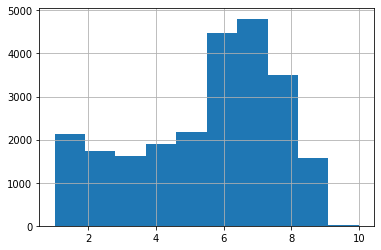

In [56]:
y_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc879340b10>]],
      dtype=object)

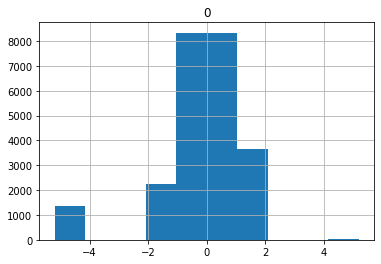

In [57]:
qt_train = QuantileTransformer(output_distribution='normal', copy=True)
y_train = pd.DataFrame(qt_train.fit_transform(np.array(y_train).reshape(-1, 1)))
y_train.hist()

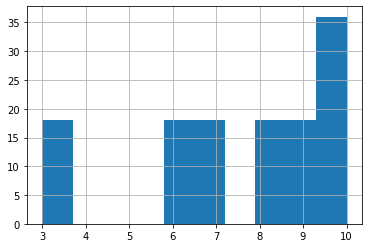

In [58]:
y_test.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8798fcc50>]],
      dtype=object)

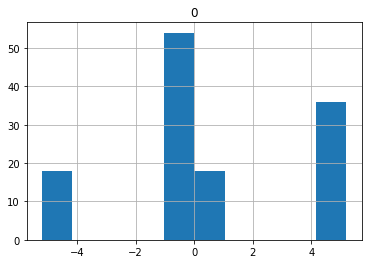

In [59]:
qt_test = QuantileTransformer(output_distribution='normal', copy=True)
y_test = pd.DataFrame(qt_test.fit_transform(np.array(y_test).reshape(-1, 1)))
y_test.hist()

In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
alphas = np.logspace(-4, 0, 10)
l1_ratios = np.linspace(0, 1, 5)
print(alphas)
# searcher = GridSearchCV(ElasticNet(), [{"alpha": alphas}], scoring="neg_mean_absolute_percentage_error", cv=10, verbose=10)
searcher = GridSearchCV(ElasticNet(), [{"alpha": alphas, "l1_ratio":l1_ratios}], cv=7, verbose=10)
searcher.fit(X_train, y_train)

# alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# searcher = GridSearchCV(ElasticNet(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5)
# searcher.fit(X_train, y_train)

[1.00000000e-04 2.78255940e-04 7.74263683e-04 2.15443469e-03
 5.99484250e-03 1.66810054e-02 4.64158883e-02 1.29154967e-01
 3.59381366e-01 1.00000000e+00]
Fitting 7 folds for each of 50 candidates, totalling 350 fits
[CV 1/7; 1/50] START alpha=0.0001, l1_ratio=0.0.................................
[CV 1/7; 1/50] END ..alpha=0.0001, l1_ratio=0.0;, score=0.069 total time=   6.1s
[CV 2/7; 1/50] START alpha=0.0001, l1_ratio=0.0.................................
[CV 2/7; 1/50] END ..alpha=0.0001, l1_ratio=0.0;, score=0.069 total time=   6.1s
[CV 3/7; 1/50] START alpha=0.0001, l1_ratio=0.0.................................
[CV 3/7; 1/50] END ..alpha=0.0001, l1_ratio=0.0;, score=0.067 total time=   6.1s
[CV 4/7; 1/50] START alpha=0.0001, l1_ratio=0.0.................................
[CV 4/7; 1/50] END ..alpha=0.0001, l1_ratio=0.0;, score=0.074 total time=   6.4s
[CV 5/7; 1/50] START alpha=0.0001, l1_ratio=0.0.................................
[CV 5/7; 1/50] END ..alpha=0.0001, l1_ratio=0.0;, score

GridSearchCV(cv=7, estimator=ElasticNet(),
             param_grid=[{'alpha': array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00]),
                          'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])}],
             verbose=10)

In [63]:
  print(searcher.best_params_["alpha"], searcher.best_params_["l1_ratio"])

0.0001 1.0


In [64]:
model = ElasticNet(searcher.best_params_["alpha"], l1_ratio=searcher.best_params_["l1_ratio"]).fit(X_train, y_train)

In [65]:
y_pred = model.predict(X_test)

In [66]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [67]:
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.3096717608455126
3.253350106422975
1.967554515080741


In [68]:
preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))

In [69]:
y_test_inv = qt_test.inverse_transform(np.array(y_test).reshape(-1, 1))

In [70]:
print(r2_score(y_test_inv, preds))
print(mean_absolute_percentage_error(y_test_inv, preds))
print(mean_absolute_error(y_test_inv ,preds))

0.8932966309489853
0.06575614610218644
0.4369981478829108


In [71]:
pred = [[0 for j in range(8)] for i in range(42)]
num_chans = [[0 for j in range(8)] for i in range(42)]
labels = [[0 for j in range(8)] for i in range(42)]
lbl = [[0 for j in range(8)] for i in range(42)]
for i in range(len(preds)):
    pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
    num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
    labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
labels = np.nan_to_num(labels)
pred = np.nan_to_num(pred)
predicted = []
lbl = []
for i in range(len(labels)):
    if sum(labels[i]) != 0:
        for j in range(4):
            if labels[i][j] != 0:
                lbl.append(labels[i][j])  
                predicted.append(pred[i][j])

In [72]:
for [l, p] in zip(lbl, predicted):
    print(l, p)

10.0 9.833333333333334
10.0 9.777777777777779
6.0 6.402150239454555
8.0 7.960905263933928
3.0 3.3333333333333335
7.0 7.604480162562473
9.0 8.166666666666666


In [73]:
print(r2_score(lbl, predicted))
print(mean_absolute_percentage_error(lbl, predicted))
print(mean_absolute_error(lbl ,predicted))

0.9625774291342049
0.05726554049249145
0.3716115276626649


In [74]:
def show_weights(features, weights, scales, a = 0, b = 0):
    fig, axs = plt.subplots(figsize=(14, 10), ncols=2)
    sorted_weights = sorted(zip(weights, features, scales), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    scales = [x[2] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs[0])
    axs[0].set_xlabel("Weight")
    sns.barplot(y=features, x=scales, ax=axs[1])
    axs[1].set_xlabel("Scale")
    plt.tight_layout()
    return features[a:b], weights[a:b]
  

['entropy_cumulative_residual', 'spect_corr_P8', 'spect_corr_F3', 'eig', 'time_corr_C3', 'time_corr_Fz', 'max_cross_corr_P4', 'max_cross_corr_O2', 'phase_lock_val_O1', 'time_corr_Cz', 'ch_2', 'time_corr_F4', 'ch_9', 'spect_corr_Pz', 'time_corr_Oz', 'time_corr_C4', 'time_corr_F8', 'ch_14', 'rms', 'max_cross_corr_C4', 'time_corr_P4', 'time_corr_T7', 'spect_corr_P3', 'ch_8', 'spect_corr_C4', 'time_corr_P8', 'samp_entropy', 'max_cross_corr_O1', 'time_corr_F7', 'time_corr_T8', 'entropy_shannon', 'wavelet_coef_energy_5', 'wavelet_coef_energy_3', 'wavelet_coef_energy_2', 'wavelet_coef_energy_1', 'wavelet_coef_energy_0', 'variance', 'time_corr_Pz', 'teager_kaiser_energy_6std', 'teager_kaiser_energy_6mean', 'teager_kaiser_energy_5std', 'teager_kaiser_energy_4mean', 'teager_kaiser_energy_3mean', 'teager_kaiser_energy_2mean', 'teager_kaiser_energy_1mean', 'teager_kaiser_energy_0std', 'teager_kaiser_energy_0mean', 'std', 'skewness', 'quantile', 'mean', 'max_cross_corr_Pz', 'line_length', 'kurtosis

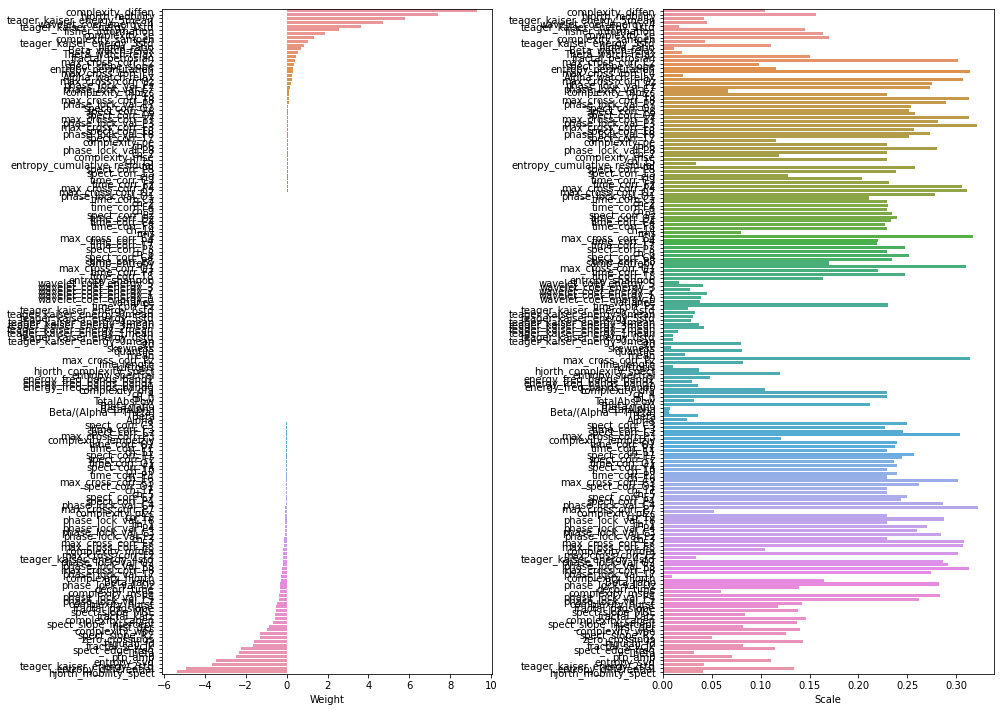

In [75]:
bad, bad_weights = show_weights(data.columns[:174], model.coef_, X_train[data.columns[:174]].std(), 40, 130)
print(bad)
print(bad_weights)

In [76]:
from sklearn.feature_selection import SelectFromModel

In [77]:
selector = SelectFromModel(estimator=model, max_features=50, prefit=True)
X_selected_train = selector.transform(X_train)
X_selected_test = selector.transform(X_test)

In [78]:
print(X_train.shape)
print(data.shape)
data_selected = data
data_selected = data_selected.drop(['labels', 'ch', 'Subj', 'film'], axis=1)
for i in range(data_selected.shape[1]):
  if not selector.get_support()[i]:
    data_selected.drop(data.columns[i], axis=1, inplace=True)
  # print()
# data_selected.drop()
print(data_selected)

(23922, 213)
(24048, 217)
       fractal_katz  fisher_information  higuchi_fd  ...  Subj_34  Subj_35  Subj_37
0          0.363249            0.279508    0.606384  ...      0.0      0.0      0.0
1          0.302930            0.284011    0.594718  ...      0.0      0.0      0.0
2          0.298399            0.274894    0.600455  ...      0.0      0.0      0.0
3          0.362881            0.198436    0.674907  ...      0.0      0.0      0.0
4          0.294442            0.309459    0.578664  ...      0.0      0.0      0.0
...             ...                 ...         ...  ...      ...      ...      ...
24043      0.344409            0.547843    0.537387  ...      0.0      0.0      0.0
24044      0.350095            0.470511    0.591223  ...      0.0      0.0      0.0
24045      0.440958            0.283860    0.805793  ...      0.0      0.0      0.0
24046      0.361852            0.480124    0.617210  ...      0.0      0.0      0.0
24047      0.238823            0.669948    0.62224

In [79]:
# to_delete = np.array(bad)
# data.drop(columns=to_delete, inplace=True)
# data

([], [])

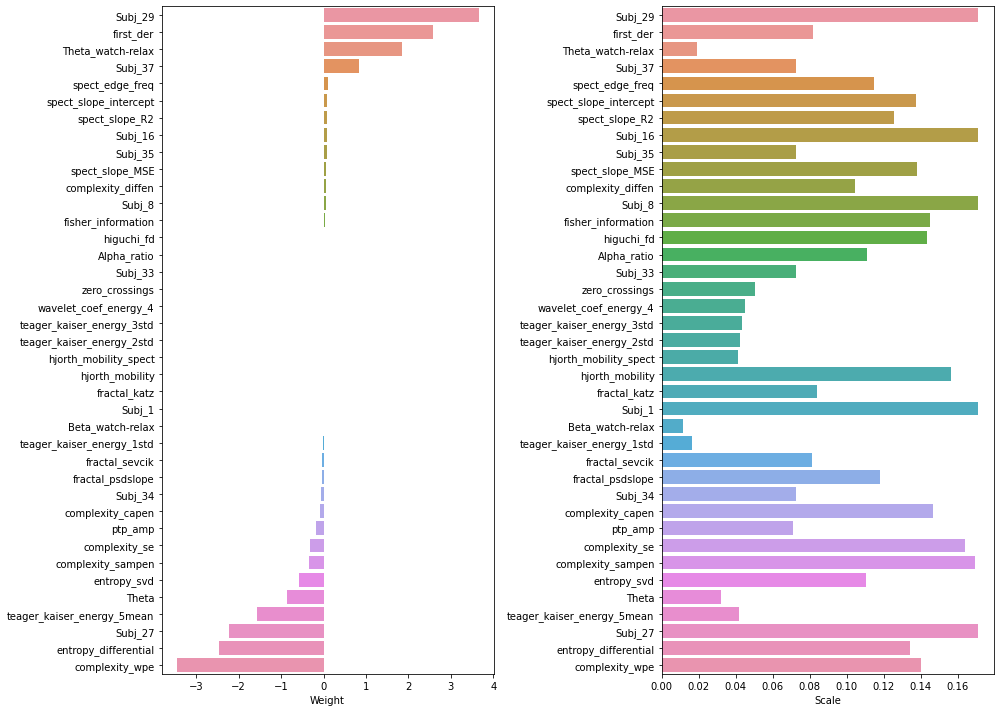

In [80]:
show_weights(data_selected.columns, model.coef_, X_train[data_selected.columns].std())

In [81]:
alphas = np.logspace(-4, 0, 10)
l1_ratios = np.linspace(0, 1, 5)
print(alphas)
# searcher = GridSearchCV(ElasticNet(), [{"alpha": alphas}], scoring="neg_mean_absolute_percentage_error", cv=10, verbose=10)
searcher = GridSearchCV(ElasticNet(), [{"alpha": alphas, "l1_ratio":l1_ratios}], cv=7, verbose=10)
searcher.fit(X_train, y_train)

# alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# searcher = GridSearchCV(ElasticNet(), [{"alpha": alphas}], scoring="neg_root_mean_squared_error", cv=5)
# searcher.fit(X_train, y_train)

[1.00000000e-04 2.78255940e-04 7.74263683e-04 2.15443469e-03
 5.99484250e-03 1.66810054e-02 4.64158883e-02 1.29154967e-01
 3.59381366e-01 1.00000000e+00]
Fitting 7 folds for each of 50 candidates, totalling 350 fits
[CV 1/7; 1/50] START alpha=0.0001, l1_ratio=0.0.................................
[CV 1/7; 1/50] END ..alpha=0.0001, l1_ratio=0.0;, score=0.069 total time=   6.2s
[CV 2/7; 1/50] START alpha=0.0001, l1_ratio=0.0.................................
[CV 2/7; 1/50] END ..alpha=0.0001, l1_ratio=0.0;, score=0.069 total time=   6.1s
[CV 3/7; 1/50] START alpha=0.0001, l1_ratio=0.0.................................
[CV 3/7; 1/50] END ..alpha=0.0001, l1_ratio=0.0;, score=0.067 total time=   6.0s
[CV 4/7; 1/50] START alpha=0.0001, l1_ratio=0.0.................................
[CV 4/7; 1/50] END ..alpha=0.0001, l1_ratio=0.0;, score=0.074 total time=   6.5s
[CV 5/7; 1/50] START alpha=0.0001, l1_ratio=0.0.................................
[CV 5/7; 1/50] END ..alpha=0.0001, l1_ratio=0.0;, score

GridSearchCV(cv=7, estimator=ElasticNet(),
             param_grid=[{'alpha': array([1.00000000e-04, 2.78255940e-04, 7.74263683e-04, 2.15443469e-03,
       5.99484250e-03, 1.66810054e-02, 4.64158883e-02, 1.29154967e-01,
       3.59381366e-01, 1.00000000e+00]),
                          'l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])}],
             verbose=10)

In [82]:
model = ElasticNet(searcher.best_params_["alpha"], l1_ratio=searcher.best_params_["l1_ratio"]).fit(X_selected_train, y_train)
# model.fit(X_selected_train, y_train)

In [83]:
y_pred = model.predict(X_selected_test)

In [84]:
print(r2_score(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.2915737390128841
3.9307691139105785
2.027096369407412


In [85]:
preds = qt_test.inverse_transform(np.array(y_pred).reshape(-1, 1))

In [86]:
y_test_inv = qt_test.inverse_transform(np.array(y_test).reshape(-1, 1))

In [87]:
print(r2_score(y_test_inv, preds))
print(mean_absolute_percentage_error(y_test_inv, preds))
print(mean_absolute_error(y_test_inv ,preds))

0.7111025572819809
0.16709836956008894
0.8037635743848486


In [88]:
pred = [[0 for j in range(8)] for i in range(42)]
num_chans = [[0 for j in range(8)] for i in range(42)]
labels = [[0 for j in range(8)] for i in range(42)]
lbl = [[0 for j in range(8)] for i in range(42)]
for i in range(len(preds)):
    pred[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += preds[i]
    num_chans[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += 1
    labels[np.array(test_subj)[i]][np.array(test_film)[i] - 41] += y_test_inv[i]
labels = np.array(labels).astype(np.float64) / np.array(num_chans).astype(np.float64)
pred = np.array(pred).astype(np.float64) / np.array(num_chans).astype(np.float64)
labels = np.nan_to_num(labels)
pred = np.nan_to_num(pred)
predicted = []
lbl = []
for i in range(len(labels)):
    if sum(labels[i]) != 0:
        for j in range(4):
            if labels[i][j] != 0:
                lbl.append(labels[i][j])  
                predicted.append(pred[i][j])

In [89]:
for [l, p] in zip(lbl, predicted):
    print(l, p)

10.0 10.0
10.0 9.722222222222221
6.0 6.657746589882404
8.0 7.5
3.0 5.094025197610945
7.0 7.888888888888889
9.0 8.236537877910518


In [90]:
print(r2_score(lbl, predicted))
print(mean_absolute_percentage_error(lbl, predicted))
print(mean_absolute_error(lbl ,predicted))

0.8271813891268975
0.1585319800413185
0.7402715108927855


([], [])

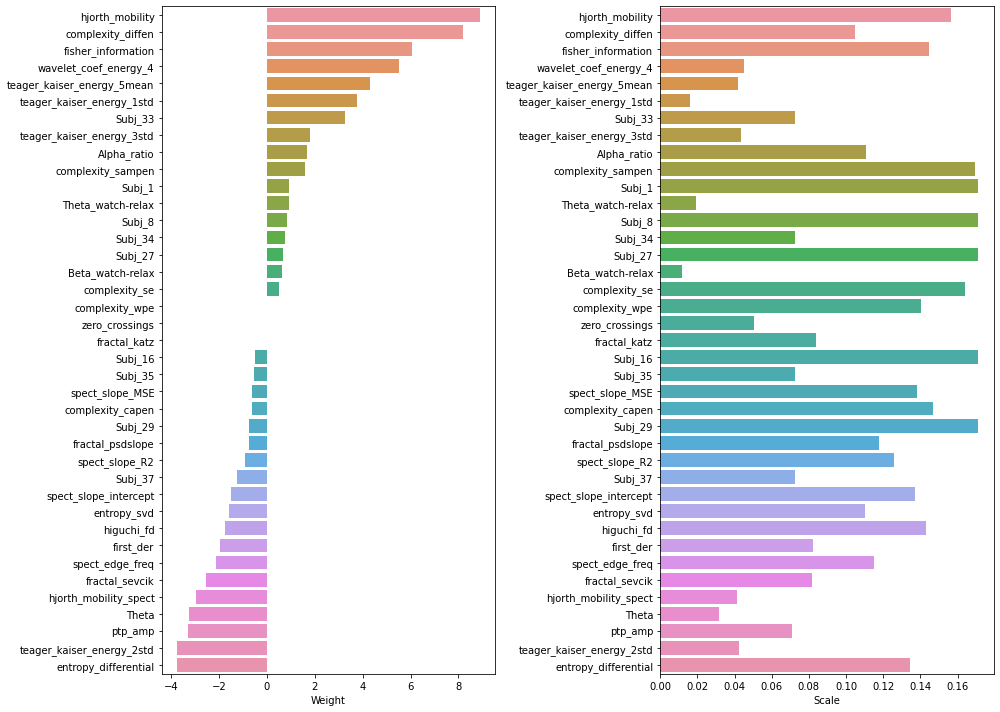

In [91]:
show_weights(data_selected.columns, model.coef_, X_train[data_selected.columns].std())

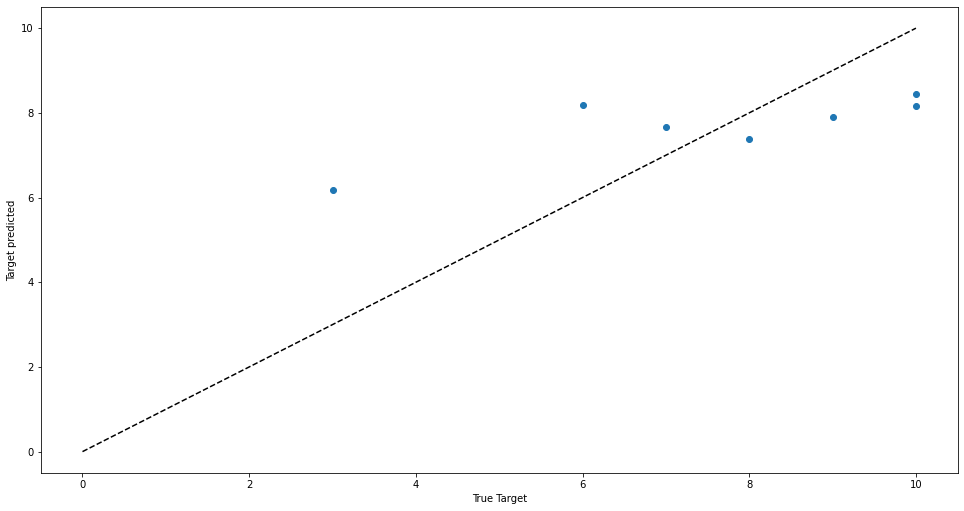

In [47]:
f, ax1 = plt.subplots(sharey=True, figsize=(15,8))

ax1.scatter(lbl, predicted)
ax1.plot([0, 10], [0, 10], '--k')
ax1.set_ylabel('Target predicted')
ax1.set_xlabel('True Target')

f.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
data_all = data.reset_index(drop=True)

In [ ]:
X = data.drop(['labels', 'ch', 'film', 'Subj'], axis=1)
X

,teager_kaiser_energy_6mean,time_corr_F8,max_cross_corr_C4,fractal_katz,phase_lock_val_F3,fisher_information,decorr_time,max_cross_corr_T8,max_cross_corr_P3,spect_corr_C4,spect_corr_O1,spect_corr_O2,energy_freq_bands_band2,entropy_spectral,teager_kaiser_energy_4mean,max_cross_corr_Pz,higuchi_fd,phase_lock_val_C3,spect_corr_F8,complexity_mspe,teager_kaiser_energy_3mean,spect_corr_P8,wavelet_coef_energy_1,entropy_svd,ptp_amp,spect_corr_T7,first_der,Theta_ratio,time_corr_O1,complexity_se,Beta,eig,max_cross_corr_T7,spect_edge_freq,teager_kaiser_energy_1std,entropy_shannon,phase_lock_val_C4,spect_corr_T8,Alpha_ratio,fractal_psdslope,...,phase_lock_val_P3,teager_kaiser_energy_4std,max_cross_corr_P8,hjorth_complexity_spect,wavelet_coef_energy_0,phase_lock_val_P7,time_corr_C3,energy_freq_bands_band0,time_corr_Fz,complexity_hurst,mean,spect_corr_F3,phase_lock_val_Oz,skewness,complexity_pe,Theta_watch-relax,max_cross_corr_O2,phase_lock_val_O2,time_corr_P8,complexity_hjorth,spect_corr_Cz,spect_corr_P7,ch_0,ch_1,ch_2,ch_3,ch_4,ch_5,ch_6,ch_7,ch_8,ch_9,ch_10,ch_11,ch_12,ch_13,ch_14,ch_15,ch_16,ch_17
0,1.116430e-04,0.218165,0.516112,0.363249,0.549476,0.279508,0.744318,0.788015,0.427071,0.295006,0.474912,0.718300,5.997866e-04,0.833149,3.973312e-04,0.381960,0.606384,0.276654,0.579787,0.673937,1.426549e-04,0.531094,5.316446e-04,0.841981,0.009052,0.465614,0.017555,0.334842,0.313937,0.000000,0.000457,6.512605e-18,0.614145,0.287671,1.865718e-05,0.000000,0.417360,0.522990,0.263139,0.271499,...,0.357093,2.292081e-04,0.147721,1.124987e-04,1.198807e-04,0.490716,0.640799,1.258449e-04,0.493024,0.092042,0.453375,0.681738,0.572757,0.433923,0.577407,0.926052,0.583218,0.455087,0.559753,0.002853,0.340885,0.521198,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.222589e-04,0.294963,0.412961,0.302930,0.000000,0.284011,0.750000,0.674391,0.210305,0.406826,0.440440,0.653111,4.977958e-04,0.821722,3.812289e-04,0.064676,0.594718,0.508282,0.577555,0.763295,1.333230e-04,0.512522,4.503062e-04,0.838877,0.010117,0.585975,0.017036,0.344609,0.282159,0.000000,0.000424,4.879550e-03,0.439469,0.273973,5.833510e-06,0.000000,0.338540,0.634557,0.304638,0.333782,...,0.185450,2.213080e-04,0.289707,1.231255e-04,1.270486e-04,0.307248,0.772169,1.231267e-04,0.793939,0.111896,0.451412,0.500028,0.163171,0.431938,0.604755,0.926052,0.234281,0.168515,0.391566,0.003362,0.357709,0.474036,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.987486e-05,0.256055,0.543653,0.298399,0.351609,0.274894,0.750000,0.660297,0.079877,0.553034,0.527207,0.219598,3.058461e-04,0.831959,2.463177e-04,0.132980,0.600455,0.459642,0.333906,0.674377,7.161345e-05,0.653404,2.654032e-04,0.845144,0.007177,0.383016,0.013598,0.324035,0.507640,0.000000,0.000181,6.655323e-03,0.197646,0.260274,3.784777e-06,0.000000,0.458562,0.399223,0.371030,0.204709,...,0.061722,1.116634e-04,0.141678,7.919855e-05,8.681914e-05,0.196146,0.729244,7.217615e-05,0.739334,0.098344,0.453488,0.382997,0.181850,0.434205,0.644685,0.926048,0.158377,0.085562,0.590096,0.003388,0.717108,0.467315,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.984681e-04,0.346090,0.389749,0.362881,0.495271,0.198436,0.750000,0.627896,0.152767,0.794022,0.244943,0.375866,6.875895e-04,0.877927,3.863896e-04,0.293595,0.674907,0.000000,0.119328,0.664225,1.416125e-04,0.731185,6.529259e-04,0.894956,0.010471,0.242772,0.023285,0.324950,0.382683,0.000000,0.000529,7.902274e-03,0.172820,0.287671,1.686301e-05,0.000000,0.316254,0.546464,0.301816,0.311477,...,0.120926,2.112132e-04,0.305221,3.276943e-04,3.417968e-04,0.071390,0.501883,1.381842e-04,0.628512,0.125523,0.450976,0.368334,0.048834,0.433128,0.777960,0.926052,0.074053,0.042786,0.362202,0.003154,0.852787,0.194723,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.145732e-04,0.584050,0.108225,0.294442,0.316123,0.309459,0.750000,0.518746,0.556116,0.409080,0.597432,0.620904,4.899098e-04,0.814577,5.351690e-04,0.685645,0.578664,0.083447,

In [ ]:
y = data['labels']
qt_all = QuantileTransformer(output_distribution='normal', copy=True)
y = pd.DataFrame(qt_all.fit_transform(np.array(y).reshape(-1, 1)))
y

,0
0,0.945616
1,0.945616
2,0.945616
3,0.945616
4,0.945616
...,...
24043,1.942703
24044,1.942703
24045,1.942703
24046,1.942703


In [ ]:
print(r2_score(y, preds))
print(mean_absolute_percentage_error(y, preds))
print(mean_absolute_error(y, preds))

ValueError: ignored

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
sfm = SelectFromModel(ElasticNet()).fit(X, y)

print(f"Features selected by SelectFromModel: {X.columns[sfm.get_support()]}")

Features selected by SelectFromModel: Index(['max_cross_corr_C4', 'fractal_katz', 'decorr_time', 'max_cross_corr_T8',
       'max_cross_corr_P3', 'entropy_spectral', 'teager_kaiser_energy_4mean',
       'higuchi_fd', 'complexity_mspe', 'ptp_amp', 'first_der',
       'complexity_se', 'eig', 'spect_edge_freq', 'teager_kaiser_energy_1std',
       'entropy_shannon', 'Alpha_ratio', 'fractal_psdslope',
       'teager_kaiser_energy_1mean', 'max_cross_corr_F4',
       'spect_slope_intercept', 'wavelet_coef_energy_4', 'max_cross_corr_F7',
       'teager_kaiser_energy_2std', 'zero_crossings', 'std', 'complexity_mse',
       'time_corr_T8', 'time_corr_P3', 'hjorth_mobility_spect',
       'teager_kaiser_energy_5mean', 'quantile', 'complexity_capen',
       'phase_lock_val_Cz', 'rms', 'phase_lock_val_O1', 'spect_slope_slope',
       'spect_slope_R2', 'max_cross_corr_F8', 'complexity_sampen',
       'fractal_petrosian', 'phase_lock_val_Fz', 'max_cross_corr_P7',
       'max_cross_corr_F3', 'max_cross

In [ ]:
import tqdm
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression